# **Autism Spectrum Disorder Detection**

This project aims at building a Machine Learning classification model that detects the occurence of Autism Spectrum Disorder in humans.

# **Importing Libraries**

In [92]:
import os
import glob
import pandas as pd
import numpy as np

#Missing data handling library
from sklearn.impute import SimpleImputer

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Converting datasets from .arff to .csv format**

In [93]:
files = [arff for arff in os.listdir(".") if arff.endswith(".arff")]

def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# loop for reading and writing files
for n,file in enumerate(files):
    with open(path_to_directory+file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)


# **Combining datasets for Children, Adults and Adolescents**

In [94]:
path = "."

all_files = glob.glob(os.path.join(path, "Autism-*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "Autism-Combined-Data.csv")


# **Dataset Analysis**

In [95]:
#Importing the dataset to dataframe
combined_df = pd.read_csv( "Autism-Combined-Data.csv")

In [96]:
#Shape of the dataset
combined_df.shape

(2200, 23)

In [97]:
#Dataset headers
combined_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'A1_Score', 'A2_Score', 'A3_Score',
       'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score',
       'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim',
       'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation',
       'Class/ASD'],
      dtype='object')

In [98]:
#First five rows of the dataset
combined_df.head()

,Unnamed: 0,Unnamed: 0.1,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0.0,0,0,0,1,1,1,1,1,1,0,15,m,Hispanic,yes,yes,Austria,no,6,'12-16 years',Parent,NO
1,1,1.0,0,0,0,0,0,0,0,0,1,1,15,m,Black,no,no,Austria,no,2,'12-16 years',Relative,NO
2,2,2.0,0,0,0,0,0,0,0,0,1,1,12,f,?,no,no,AmericanSamoa,no,2,'12-16 years',?,NO
3,3,3.0,0,1,1,1,1,1,0,1,1,0,14,f,White-European,no,no,'United Kingdom',no,7,'12-16 years',Self,YES
4,4,4.0,1,1,1,1,1,1,1,0,0,0,16,f,?,no,no,Albania,no,7,'12-16 years',?,YES


In [99]:
#Dataset information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2200 non-null   int64  
 1   Unnamed: 0.1     1100 non-null   float64
 2   A1_Score         2200 non-null   int64  
 3   A2_Score         2200 non-null   int64  
 4   A3_Score         2200 non-null   int64  
 5   A4_Score         2200 non-null   int64  
 6   A5_Score         2200 non-null   int64  
 7   A6_Score         2200 non-null   int64  
 8   A7_Score         2200 non-null   int64  
 9   A8_Score         2200 non-null   int64  
 10  A9_Score         2200 non-null   int64  
 11  A10_Score        2200 non-null   int64  
 12  age              2200 non-null   object 
 13  gender           2200 non-null   object 
 14  ethnicity        2200 non-null   object 
 15  jundice          2200 non-null   object 
 16  austim           2200 non-null   object 
 17  contry_of_res 

In [100]:
#Datatypes
combined_df.dtypes

Unnamed: 0           int64
Unnamed: 0.1       float64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                 object
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object

# **Data Cleaning and Preprocessing**

In [101]:
data_frame = combined_df[['age', 'gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation', 'jundice', 'used_app_before',
         'austim', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result', 'Class/ASD']]

In [102]:
data_frame.head()

,age,gender,ethnicity,contry_of_res,age_desc,relation,jundice,used_app_before,austim,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class/ASD
0,15,m,Hispanic,Austria,'12-16 years',Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,Austria,'12-16 years',Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,?,AmericanSamoa,'12-16 years',?,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,White-European,'United Kingdom','12-16 years',Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,?,Albania,'12-16 years',?,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES


In [103]:
data_frame.columns=['age','sex','nationality','country_of_res','age_desc','relation','jaundice','screen_app_used',
                    'autism','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                   'A9_Score','A10_Score','result','target']

In [104]:
data_frame.head()

,age,sex,nationality,country_of_res,age_desc,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,target
0,15,m,Hispanic,Austria,'12-16 years',Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,Austria,'12-16 years',Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,?,AmericanSamoa,'12-16 years',?,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,White-European,'United Kingdom','12-16 years',Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,?,Albania,'12-16 years',?,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES


In [105]:
#Replacing missing values with Nan
data_frame=data_frame.replace('?', np.nan)

data_frame.head()

,age,sex,nationality,country_of_res,age_desc,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,target
0,15,m,Hispanic,Austria,'12-16 years',Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,Austria,'12-16 years',Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,NaN,AmericanSamoa,'12-16 years',NaN,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,White-European,'United Kingdom','12-16 years',Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,NaN,Albania,'12-16 years',NaN,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES


In [106]:
#Missing value count
print(data_frame.isnull().sum())

age                 12
sex                  0
nationality        288
country_of_res       0
age_desc             0
relation           288
jaundice             0
screen_app_used      0
autism               0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
result               0
target               0
dtype: int64


# **Missing Value Handling**

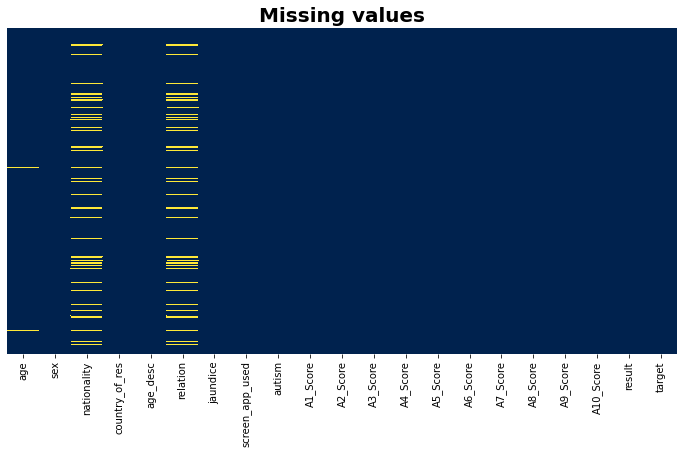

In [107]:
plt.figure(figsize=(12, 6))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='cividis');
plt.show()

### Missing value handling in Age column

In [108]:
def impute_age(cols):
    age = cols[0]
    age_desc = cols[1]
    
    if pd.isnull(age):
        if age_desc == '18 and more':
            return 18
        elif age_desc == '4-11 years':
            return 4
        else:
            return 1
    else:
        return age
        
data_frame['age'] = data_frame[['age','age_desc']].apply(impute_age,axis=1)    


### Missing value handling in Test Taker column

In [109]:
test_taker = data_frame['relation'].mode()
data_frame['relation'] = data_frame['relation'].fillna(test_taker[0])

### Outlier Detection

In [110]:
data_frame["age"] = data_frame["age"].astype(str).astype(int)

Text(0.5, 1.0, 'Outlier Detection')

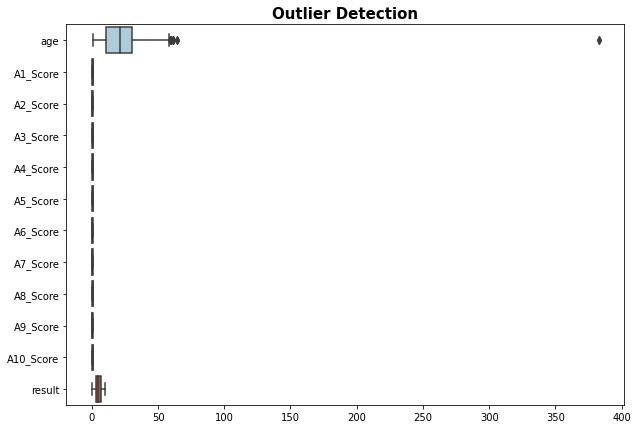

In [111]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(data=data_frame,palette='Paired',orient='h')
plt.title('Outlier Detection', fontsize=15, weight='bold')

In [112]:
def impute_age(cols):
    age = cols[0]
    age_desc = cols[1]
    
    if age>100:
        if age_desc == '18 and more':
            return 18
        elif age_desc == '4-11 years':
            return 4
        else:
            return 1
    else:
        return age
    
data_frame['age'] = data_frame[['age','age_desc']].apply(impute_age,axis=1)

### Removing Punctuaction from dataset

In [113]:
import string
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

data_frame['country_of_res'] = data_frame['country_of_res'].apply(lambda x: remove_punct(x))
data_frame['age_desc'] = data_frame['age_desc'].apply(lambda x: remove_punct(x))
data_frame['relation'] = data_frame['relation'].apply(lambda x: remove_punct(x))

### Cleaning the data in column Age Description

In [114]:
def impute_age(cols):
    age = cols[0]
    age_desc = cols[1]
    
    if age >= 1 and age < 4 :      
            return "Adolescent"
    elif age >= 4 and age <= 17 :
            return "Children"
    else:
            return "Adult"
    
data_frame['age_desc'] = data_frame[['age','age_desc']].apply(impute_age,axis=1)

### Missing valuehandling in column nationality

In [115]:
def impute_nationality(cols):
    nationality = cols[0]
    country_of_res = cols[1]
    
    if pd.isnull(nationality):
        if (country_of_res == 'AmericanSamoa'):      
            return "Black"
        elif (country_of_res == 'Albania' or country_of_res == 'Belgium' or country_of_res == 'Argentina' or 
        country_of_res == 'Austria' or country_of_res == 'United States' or country_of_res == 'United Kingdom' 
        or country_of_res == 'New Zealand' or country_of_res == 'Ukraine'):
            return "White-European"
        elif (country_of_res == 'Afghanistan' or country_of_res == 'Egypt' or country_of_res == 'United Arab Emirates' or 
        country_of_res == 'Saudi Arabia' or country_of_res == 'Jordan' or country_of_res == 'Kuwait' or country_of_res == 'Syria'
        or country_of_res == 'Iran'):
            return "Middle Eastern"
        elif (country_of_res == 'Bahamas' or country_of_res == 'Lebanon' or country_of_res == 'Hong Kong' 
        or country_of_res == 'Kazakhstan' or country_of_res == 'Pakistan'):      
            return "Asian"
        elif (country_of_res == 'Brazil'):
            return 'Latino'
        else:
            return "Others"
    else:
        return nationality
    
data_frame['nationality'] = data_frame[['nationality','country_of_res']].apply(impute_nationality,axis=1)

### Removing punctuation in column Nationality

In [116]:
data_frame['nationality'] = data_frame['nationality'].apply(lambda x: remove_punct(x))

### Changing the value South Asian to Asian in column Nationality

In [117]:
def impute_nationality(cols):
    nationality = cols[0]
    
    if nationality == 'South Asian':
            return 'Asian'
    else:
        return nationality
   
data_frame['nationality'] = data_frame[['nationality']].apply(impute_nationality,axis=1)

In [118]:
def impute_nationality(cols):
    nationality = cols[0]
    
    if nationality == 'others':
            return 'Others'
    else:
        return nationality
   
data_frame['nationality'] = data_frame[['nationality']].apply(impute_nationality,axis=1)

### Cleaning data in Test Taker Column

In [119]:
def impute_testtaker(cols):
    test_taker = cols[0]
    
    if test_taker == 'self' :      
            return "Self"
    else:
            return test_taker
    
data_frame['relation'] = data_frame[['relation']].apply(impute_testtaker,axis=1)

### Checking for missing values

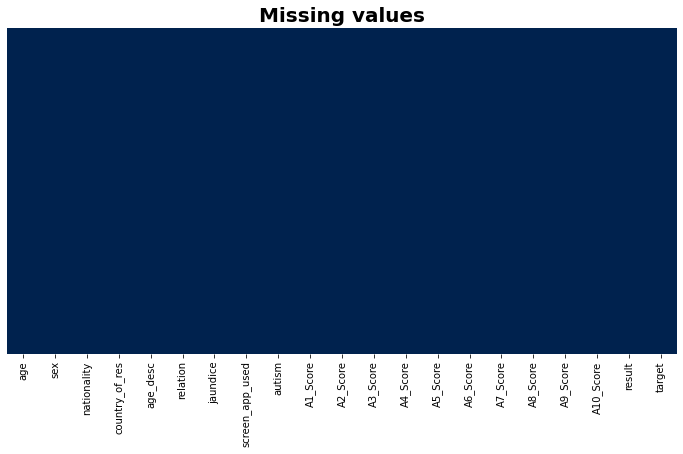

In [120]:
plt.figure(figsize=(12, 6))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='cividis');
plt.show()

### Saving the cleaned data

In [121]:
data_frame.to_csv("Autism_cleaned_data.csv")

In [122]:
data_frame.head()

,age,sex,nationality,country_of_res,age_desc,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,target
0,15,m,Hispanic,Austria,Children,Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,Austria,Children,Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,Black,AmericanSamoa,Children,Self,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,WhiteEuropean,United Kingdom,Children,Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,WhiteEuropean,Albania,Children,Self,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES


# **Statistical Analysis**

In [123]:
data_frame.describe()

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,21.610909,0.699091,0.482727,0.551818,0.530000,0.587273,0.443636,0.477273,0.605455,0.412727,0.621818,5.411818
std,12.936880,0.458758,0.499815,0.497421,0.499213,0.492436,0.496926,0.499597,0.488864,0.492436,0.485044,2.522918
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,21.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000
75%,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.250000
max,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


# **Data Visualization**

In [124]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 

### DataFrame Correlation

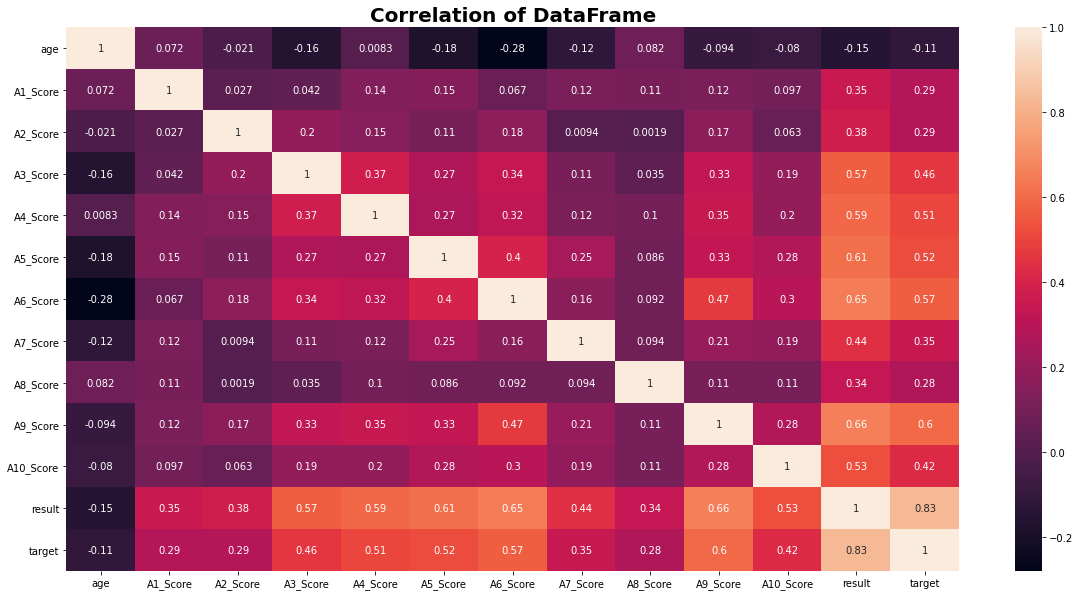

In [125]:
data_frame['target']=data_frame['target'].replace({'NO': 0, 'YES': 1})
plt.figure(figsize=(20, 10))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(data_frame.corr(),annot=True);

### Boxplot of DataFrame

Text(0.5, 1.0, 'Box plot of DataFrame')

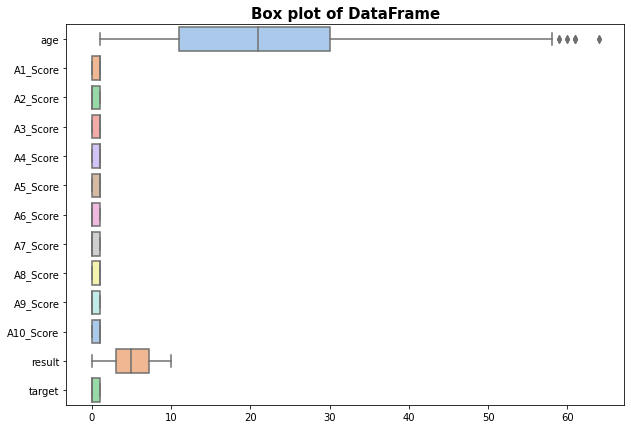

In [126]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(data=data_frame,palette='pastel',orient='h')
plt.title('Box plot of DataFrame', fontsize=15, weight='bold')

### Distribution of ASD

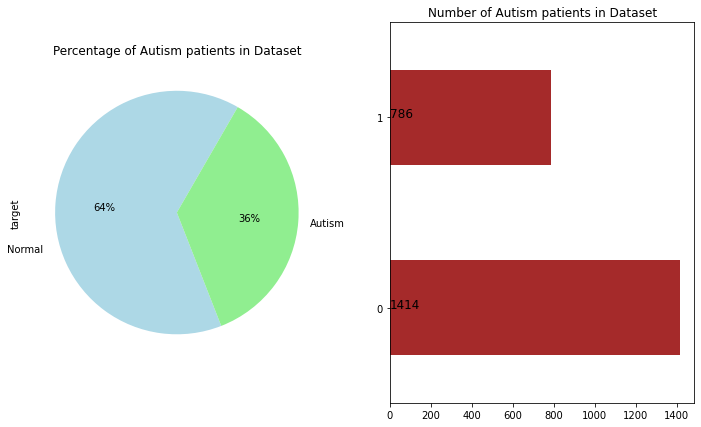

In [127]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,7))

ax1 = data_frame['target'].value_counts().plot.pie( colors=['lightblue','lightgreen'],autopct = "%1.0f%%",
                                                   labels=["\n\n\n\n\n\n\n\nNormal","Autism"], startangle = 60,ax=ax1); 
            
ax1.set(title = 'Percentage of Autism patients in Dataset')

ax2 = data_frame["target"].value_counts().plot(kind="barh" ,ax =ax2,color='brown')
for i,j in enumerate(data_frame["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'Number of Autism patients in Dataset')
plt.show()

### Age Group Counts

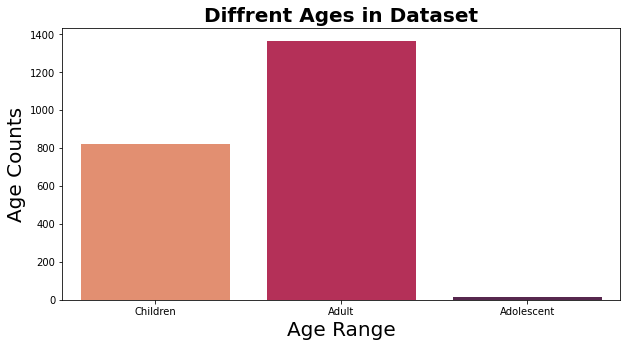

In [128]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age_desc',data=data_frame,palette='rocket_r')
plt.xlabel('Age Range',size='20')
plt.ylabel('Age Counts',size='20')
plt.title('Diffrent Ages in Dataset',size='20',weight='bold')
plt.show()

### Distribution graph of Age and Gender of Autism and Normal patients

In [129]:
data_frame['target']=data_frame['target'].replace({0: 'NO', 1: 'YES'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Distribution of Autism Patients')

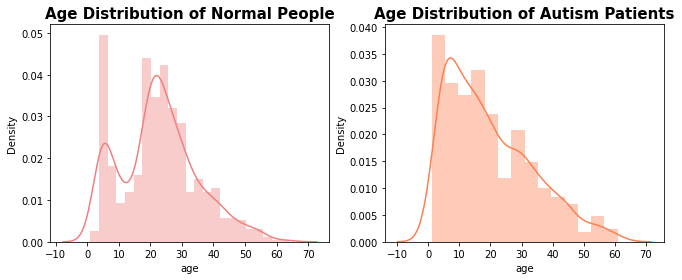

In [130]:
attr_1=data_frame[data_frame['target']== 'YES']
attr_0=data_frame[data_frame['target']== 'NO']

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'],color='lightcoral');
plt.title('Age Distribution of Normal People', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.distplot(attr_1['age'],color='coral');
plt.title('Age Distribution of Autism Patients', fontsize=15, weight='bold')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



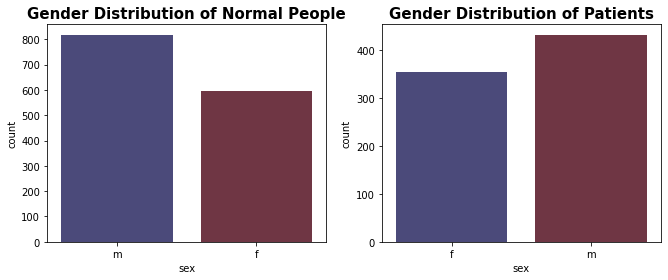

In [131]:
attr_1=data_frame[data_frame['target']== 'YES']
attr_0=data_frame[data_frame['target']== 'NO']


fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['sex'], palette='icefire');
plt.title('Gender Distribution of Normal People', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='icefire');
plt.title('Gender Distribution of Patients', fontsize=15, weight='bold' )
plt.show()


In [132]:
data_frame=pd.read_csv("Autism_cleaned_data.csv")

In [133]:
data_frame.head()

,Unnamed: 0,age,sex,nationality,country_of_res,age_desc,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,target
0,0,15,m,Hispanic,Austria,Children,Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,1,15,m,Black,Austria,Children,Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,2,12,f,Black,AmericanSamoa,Children,Self,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,3,14,f,WhiteEuropean,United Kingdom,Children,Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,4,16,f,WhiteEuropean,Albania,Children,Self,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES


### Nationality wise - Counts of ASD and Non-ASD Patients

In [134]:
nationality_details = pd.DataFrame(data_frame.groupby(['nationality','target']).count()['age'])
nationality_details.columns = ['Nationality_wise_count']
nationality_details.reset_index(inplace=True)

Text(0.5, 1.0, 'Nationality wise - Counts of ASD and Non-ASD Patients')

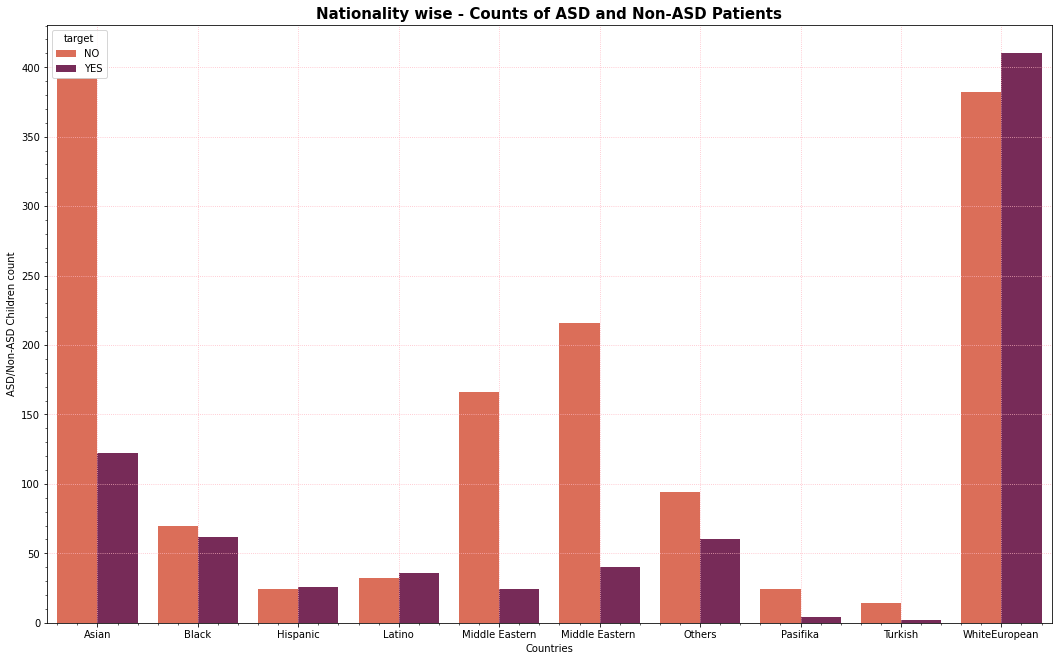

In [135]:
plt.figure(figsize=(18,11))
sns.barplot(x=nationality_details['nationality'],y=nationality_details['Nationality_wise_count'],
            hue=nationality_details['target'],palette='rocket_r')
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel('Countries')
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Nationality wise - Counts of ASD and Non-ASD Patients',fontsize=15, weight='bold')

### Jaundice wise Counts of ASD and Non-ASD Patients

In [136]:
jaundice_details = pd.DataFrame(data_frame.groupby(['jaundice','target']).count()['age'])
jaundice_details.columns = ['jaundice_wise_counts']
jaundice_details.reset_index(inplace=True)

Text(0.5, 1.0, 'Jaundice wise -- Counts of ASD and Non-ASD Patients')

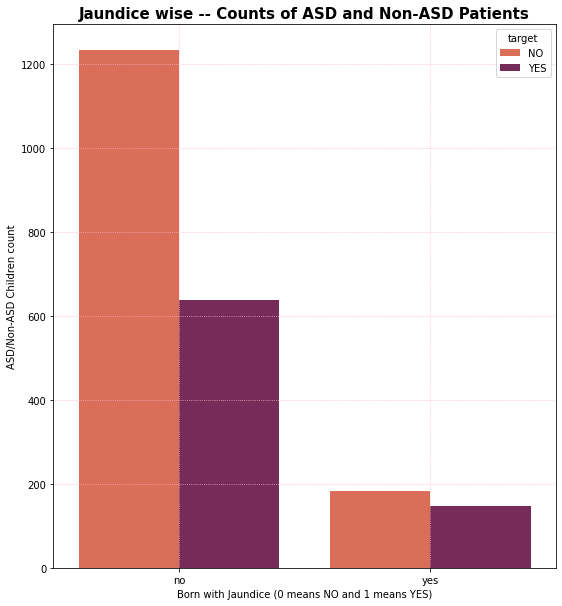

In [137]:
plt.figure(figsize=(9,10))
sns.barplot(x=jaundice_details['jaundice'],y=jaundice_details['jaundice_wise_counts'],
            hue=jaundice_details['target'],palette='rocket_r')
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel('Born with Jaundice (0 means NO and 1 means YES)')
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Jaundice wise -- Counts of ASD and Non-ASD Patients',fontsize=15, weight='bold')

### Test Taker Counts of ASD and Non-ASD patients

In [138]:
testtaker_details = pd.DataFrame(data_frame.groupby(['relation','target']).count()['age'])
testtaker_details.columns = ['test_taker_counts']
testtaker_details.reset_index(inplace=True)

Text(0.5, 1.0, 'Test Taker Counts of ASD and Non-ASD patients')

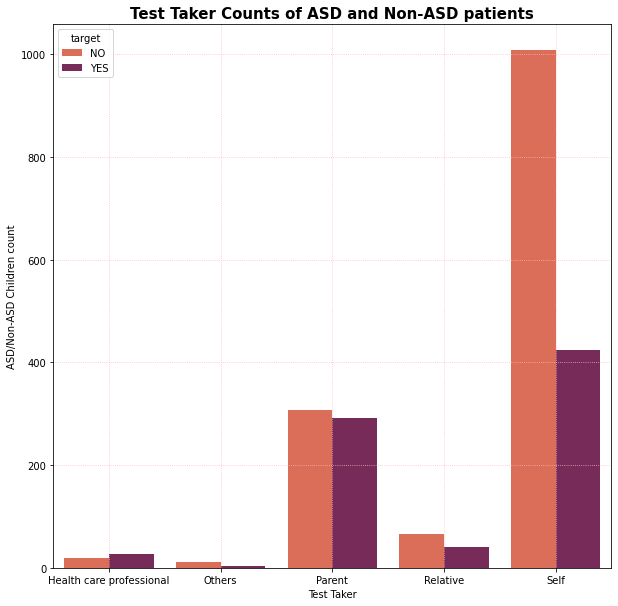

In [139]:
plt.figure(figsize=(10,10))
sns.barplot(x=testtaker_details['relation'],y=testtaker_details['test_taker_counts'],
            hue=testtaker_details['target'],palette='rocket_r')
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel('Test Taker')
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Test Taker Counts of ASD and Non-ASD patients',fontsize=15, weight='bold')

### Screening App Use-Counts of ASD and Non-ASD Patients

In [140]:
screening_app_details = pd.DataFrame(data_frame.groupby(['screen_app_used','target']).count()['age'])
screening_app_details.columns = ['Screening_counts']
screening_app_details.reset_index(inplace=True)


Text(0.5, 1.0, 'Screening App Use -- Counts of ASD and Non-ASD Patients')

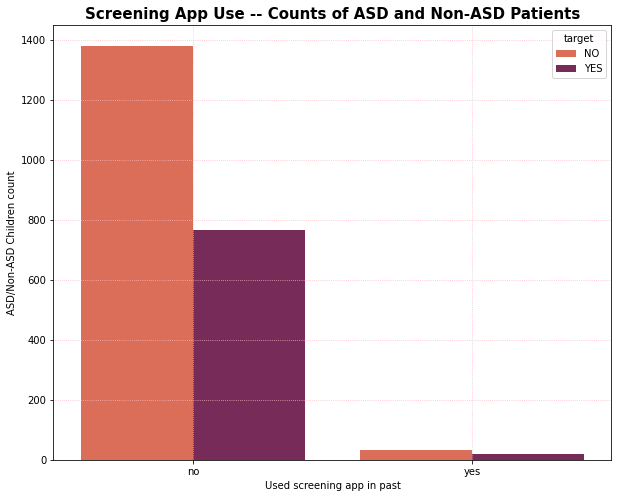

In [141]:
plt.figure(figsize=(10,8))
sns.barplot(x=screening_app_details['screen_app_used'],y=screening_app_details['Screening_counts'],
            hue=screening_app_details['target'],palette='rocket_r')
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel('Used screening app in past')
plt.ylabel('ASD/Non-ASD Children count')
plt.title('Screening App Use -- Counts of ASD and Non-ASD Patients',fontsize=15, weight='bold')

In [142]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
from plotly import tools
import plotly.tools as tls
import plotly.express as px


In [143]:
data_frame.rename(columns = {'result':'screen_result'}, inplace = True)

In [144]:
fig = px.histogram(data_frame, x="nationality", y="screen_result",
              color="screen_result",title="Interactive Graph 1")
fig.show()

# **Feature Encoding**

In [145]:
data_frame

,Unnamed: 0,age,sex,nationality,country_of_res,age_desc,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,screen_result,target
0,0,15,m,Hispanic,Austria,Children,Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,1,15,m,Black,Austria,Children,Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,2,12,f,Black,AmericanSamoa,Children,Self,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,3,14,f,WhiteEuropean,United Kingdom,Children,Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,4,16,f,WhiteEuropean,Albania,Children,Self,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,7,f,WhiteEuropean,United Kingdom,Children,Parent,yes,no,yes,1,1,1,1,1,1,1,1,1,1,10,YES
2196,2196,7,f,WhiteEuropean,Australia,Children,Parent,yes,no,yes,1,0,0,0,1,0,1,0,0,1,4,NO
2197,2197,4,m,Latino,Brazil,Children,Parent,no,no,no,1,0,1,1,1,1,1,0,0,1,7,YES
2198,2198,4,m,Asian,India,Children,Parent,no,no,no,1,1,1,0,1,1,1,1,1,1,9,YES


In [146]:
del data_frame['age_desc']

In [147]:
data_frame

,Unnamed: 0,age,sex,nationality,country_of_res,relation,jaundice,screen_app_used,autism,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,screen_result,target
0,0,15,m,Hispanic,Austria,Parent,yes,no,yes,0,0,0,1,1,1,1,1,1,0,6,NO
1,1,15,m,Black,Austria,Relative,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
2,2,12,f,Black,AmericanSamoa,Self,no,no,no,0,0,0,0,0,0,0,0,1,1,2,NO
3,3,14,f,WhiteEuropean,United Kingdom,Self,no,no,no,0,1,1,1,1,1,0,1,1,0,7,YES
4,4,16,f,WhiteEuropean,Albania,Self,no,no,no,1,1,1,1,1,1,1,0,0,0,7,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,7,f,WhiteEuropean,United Kingdom,Parent,yes,no,yes,1,1,1,1,1,1,1,1,1,1,10,YES
2196,2196,7,f,WhiteEuropean,Australia,Parent,yes,no,yes,1,0,0,0,1,0,1,0,0,1,4,NO
2197,2197,4,m,Latino,Brazil,Parent,no,no,no,1,0,1,1,1,1,1,0,0,1,7,YES
2198,2198,4,m,Asian,India,Parent,no,no,no,1,1,1,0,1,1,1,1,1,1,9,YES


In [148]:
!pip install category_encoders

In [149]:
import category_encoders as ce
import pandas as pd

In [150]:
encoder= ce.BinaryEncoder(cols=['nationality'],return_df=True)
data = data_frame[['nationality']]
data_encoded=encoder.fit_transform(data) 
data_encoded

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
2195,0,0,0,1,1
2196,0,0,0,1,1
2197,0,1,0,0,0
2198,0,0,1,1,0


In [151]:
encoder= ce.BinaryEncoder(cols=['country_of_res'],return_df=True)
datanew = data_frame[['country_of_res']]
data_encodednew=encoder.fit_transform(datanew) 
data_encodednew

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,1,1
2196,0,0,0,0,0,1,1,1
2197,0,0,0,1,0,0,0,0
2198,0,0,0,1,0,0,1,0


In [152]:
data1 = data_frame[['relation']]
data_encoded1 = pd.get_dummies(data=data1,drop_first=True)


In [153]:
data2 = data_frame[['jaundice']]
data_encoded2 = pd.get_dummies(data=data2,drop_first=True)


In [154]:
data3 = data_frame[['screen_app_used']]
data_encoded3 = pd.get_dummies(data=data3,drop_first=True)


In [155]:
data4 = data_frame[['autism']]
data_encoded4 = pd.get_dummies(data=data4,drop_first=True)


In [156]:
data5 = data_frame[['target']]
data_encoded5 = pd.get_dummies(data=data5,drop_first=True)


In [157]:
data6 = data_frame[['sex']]
data_encoded6 = pd.get_dummies(data=data6,drop_first=True)


In [158]:
data_frame = pd.concat([data_frame,data_encoded,data_encodednew,data_encoded1,data_encoded2,data_encoded3,data_encoded4,data_encoded5,data_encoded6],axis=1)

In [159]:
data_frame.drop(['sex','nationality','country_of_res','relation','jaundice','screen_app_used','target','autism'],axis=1,inplace=True)

In [160]:
data_frame

,Unnamed: 0,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,screen_result,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,relation_Others,relation_Parent,relation_Relative,relation_Self,jaundice_yes,screen_app_used_yes,autism_yes,target_YES,sex_m
0,0,15,0,0,0,1,1,1,1,1,1,0,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1
1,1,15,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,2,12,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,3,14,0,1,1,1,1,1,0,1,1,0,7,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
4,4,16,1,1,1,1,1,1,1,0,0,0,7,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,7,1,1,1,1,1,1,1,1,1,1,10,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0
2196,2196,7,1,0,0,0,1,0,1,0,0,1,4,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0
2197,2197,4,1,0,1,1,1,1,1,0,0,1,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
2198,2198,4,1,1,1,0,1,1,1,1,1,1,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1


In [161]:
data_frame = data_frame[['age','screen_result','nationality_0','nationality_1','nationality_2',
                        'nationality_3','nationality_4','jaundice_yes','autism_yes',
                        'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score',
                        'A10_Score','target_YES']]

In [162]:
data_frame = data_frame[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score',
                        'A10_Score','jaundice_yes','autism_yes','target_YES']]

# **Data Splitting**

In [163]:
#Splitting data library
from sklearn.model_selection import train_test_split

#Feature scaling library
from sklearn.preprocessing import StandardScaler

#Model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Performance evaluation library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn import tree

In [164]:
data_frame.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,jaundice_yes,autism_yes,target_YES
0,0,0,0,1,1,1,1,1,1,0,1,1,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,1,1,1,1,0,1,1,0,0,0,1
4,1,1,1,1,1,1,1,0,0,0,0,0,1


In [165]:
X = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, -1].values
print(X)
print(y)

[[0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [0 0 1 ... 0 0 0]]
[0 0 0 ... 1 1 0]


In [166]:
#Data Splitting

X = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, -1].values

In [167]:
#80% training set and 20% test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1760 samples.
Testing set has 440 samples.


In [168]:
sc=StandardScaler()
X_train[:,0:2]=sc.fit_transform(X_train[:,0:2])
X_test[:,0:2]=sc.transform(X_test[:,0:2])

# **KNN Classifier**

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
knn = KNeighborsClassifier(n_neighbors=1)

In [171]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [172]:
pred = knn.predict(X_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix

In [174]:
print(confusion_matrix(y_test,pred))

[[267   2]
 [  0 171]]


In [175]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       269
           1       0.99      1.00      0.99       171

    accuracy                           1.00       440
   macro avg       0.99      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



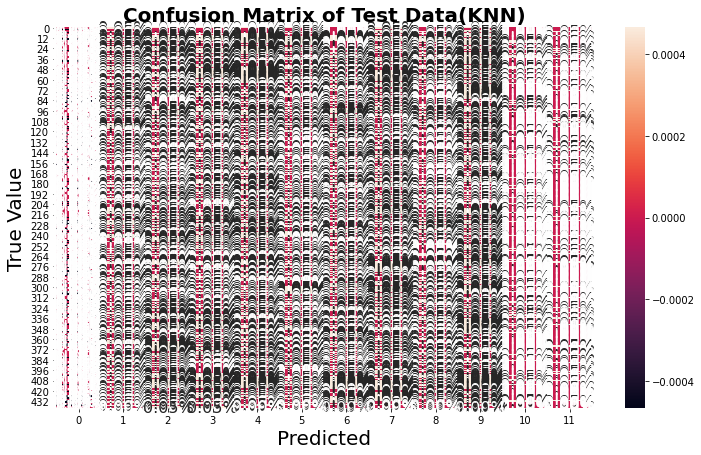

In [176]:
plt.figure(figsize=(12, 7))
sns.heatmap(X_test/np.sum(X_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data(KNN)",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

In [177]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

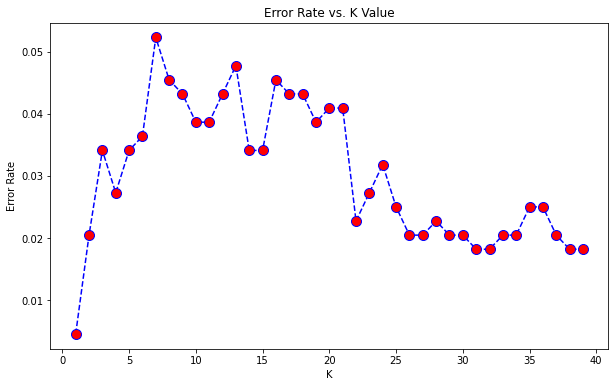

In [178]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [179]:
for n in range(10, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, X, y, cv=10)
    print (n, cv_scores.mean())

10 0.9672727272727272
11 0.9618181818181817
12 0.9704545454545455
13 0.9618181818181819
14 0.9604545454545456
15 0.9595454545454546
16 0.9640909090909091
17 0.9604545454545456
18 0.9663636363636364
19 0.9627272727272727
20 0.9627272727272727
21 0.9631818181818183
22 0.9631818181818181
23 0.9586363636363636
24 0.9690909090909091
25 0.9640909090909091
26 0.9668181818181818
27 0.9659090909090908
28 0.9690909090909091
29 0.9672727272727272
30 0.9713636363636364
31 0.9713636363636364
32 0.974090909090909
33 0.9681818181818181
34 0.9745454545454546
35 0.9690909090909091
36 0.9709090909090909
37 0.9713636363636364
38 0.9713636363636363
39 0.9713636363636363
40 0.9713636363636363
41 0.9690909090909091
42 0.9718181818181819
43 0.9677272727272725
44 0.9713636363636364
45 0.9681818181818181
46 0.9704545454545455
47 0.9695454545454545
48 0.97
49 0.9668181818181818


# **Logistic Regression Model**

In [180]:
LogisticsClassifier = LogisticRegression(solver='liblinear', random_state=100, C=0.5)
LogisticsClassifier.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [181]:
# Predicting the Test set results

y_pred = LogisticsClassifier.predict(X_test)
y_pred_train = LogisticsClassifier.predict(X_train)

In [182]:
# Evaluating confusion matrix of the Test set results

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [183]:
#displaying Confusion matrix value for Train Data and Test Data

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[1142    4]
 [   3  611]]

Confusion matrix of Test Data

[[268   0]
 [  1 171]]


In [184]:
# Displaying Accuracy for Train and Test data

print('\nAccuracy for training set for Logistics Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistics Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistics Regression = 0.9960227272727272
Accuracy for test set for Logistics Regression = 0.9977272727272727


In [185]:
#Performance and Evaluation of Logistic Model

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       0.99      1.00      1.00       171

    accuracy                           1.00       440
   macro avg       1.00      1.00      1.00       440
weighted avg       1.00      1.00      1.00       440



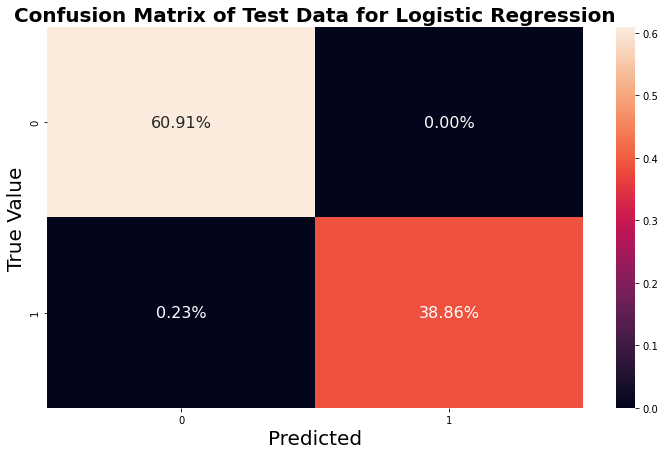

In [186]:
# Visualizing Confusion matrix for Logistic Regression
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test/np.sum(cm_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data for Logistic Regression",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# **SVM Model**

In [187]:
#SVM Model

svcClassifier = SVC(C=0.5)
svcClassifier.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
# Predicting the Test and Test set results

y_pred = svcClassifier.predict(X_test)
y_pred_train = svcClassifier.predict(X_train)

In [189]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [190]:
print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[1145    0]
 [   0  615]]

Confusion matrix of Test Data

[[269   2]
 [  0 169]]


In [191]:
print('\nAccuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 1.0
Accuracy for test set for svm = 0.9954545454545455


In [192]:
#Performance and Evaluation of Support Vector Machine
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       269
           1       1.00      0.99      0.99       171

    accuracy                           1.00       440
   macro avg       1.00      0.99      1.00       440
weighted avg       1.00      1.00      1.00       440



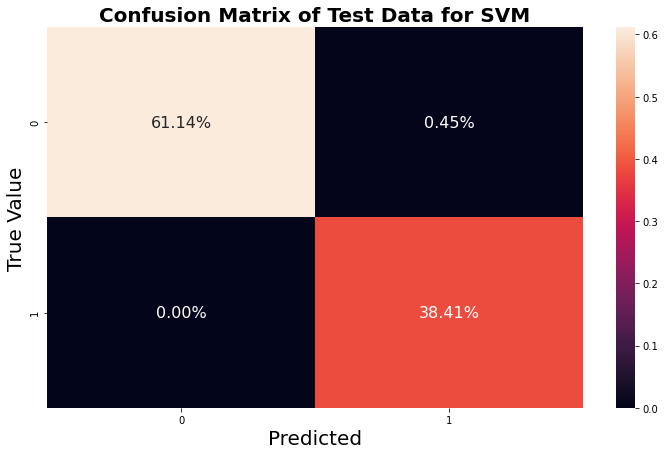

In [193]:
# Visualizing Confusion matrix for SVM
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test/np.sum(cm_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data for SVM",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# **Decision Tree Classifier**

In [194]:
# splitting data into test and train
#i_train, i_test, t_train, t_test = train_test_split(X,y,test_size=0.2,random_state=0)
#train_test_split(X,y, test_size= 0.3, random_state=100)
#X_train,X_test,y_train,y_test

In [195]:
# function to perform training with Entropy
clf_entropy= DecisionTreeClassifier(criterion= "entropy", random_state=100, max_depth=3, min_samples_leaf=5)

In [196]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [197]:
#functions to make predictions
#for train data
y_pred_en_train = clf_entropy.predict(X_train)
#for test data
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [198]:
#checkingAccuracy
print("Train Accuracy of Decision Tree Classifier is ", accuracy_score(y_train,y_pred_en_train))
print("Test Accuracy of Decision Tree Classifier is ", accuracy_score(y_test,y_pred_en))

Train Accuracy of Decision Tree Classifier is  0.8670454545454546
Test Accuracy of Decision Tree Classifier is  0.8818181818181818


[Text(418.5, 475.65000000000003, 'X[8] <= 0.5\nentropy = 0.934\nsamples = 1760\nvalue = [1145, 615]'),
 Text(209.25, 339.75, 'X[5] <= 0.5\nentropy = 0.495\nsamples = 1043\nvalue = [930, 113]'),
 Text(104.625, 203.85000000000002, 'X[4] <= 0.5\nentropy = 0.228\nsamples = 785\nvalue = [756, 29]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.0\nsamples = 515\nvalue = [515, 0]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.492\nsamples = 270\nvalue = [241, 29]'),
 Text(313.875, 203.85000000000002, 'X[3] <= 0.5\nentropy = 0.91\nsamples = 258\nvalue = [174, 84]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.427\nsamples = 126\nvalue = [115, 11]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.992\nsamples = 132\nvalue = [59, 73]'),
 Text(627.75, 339.75, 'X[4] <= 0.5\nentropy = 0.881\nsamples = 717\nvalue = [215, 502]'),
 Text(523.125, 203.85000000000002, 'X[3] <= 0.5\nentropy = 0.803\nsamples = 151\nvalue = [114, 37]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.109\nsamples

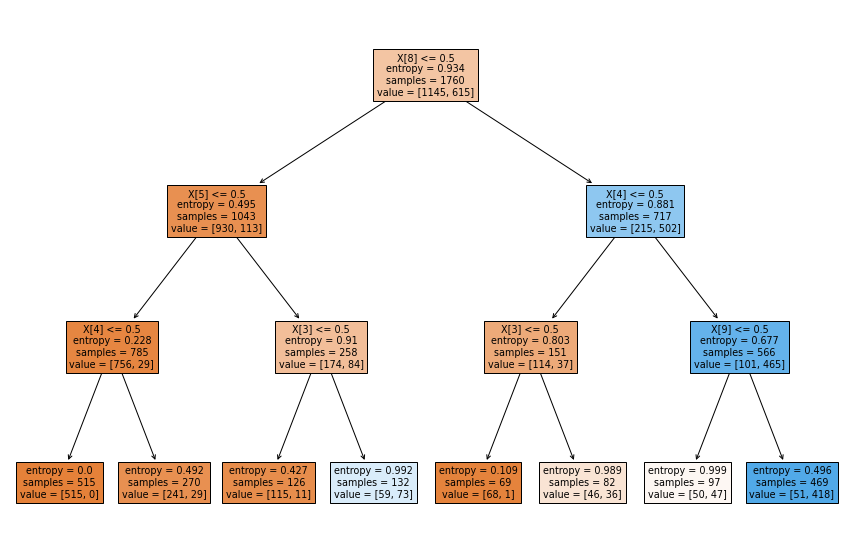

In [199]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy, filled=True)

In [200]:
print(tree.export_text(clf_entropy))

|--- feature_8 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 1

